## Monte Carlo Markov Chain Example

A walkthrough of Bayesian statistical representation as provided by Ani Madurkar in [this](https://towardsdatascience.com/applied-bayesian-inference-pt-1-322b25093f62) article. 

In [24]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
from arviz.plots.plot_utils import xarray_var_iter
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
np.random.seed = 0

# The number of samples:
n = 15

# Establishing prior and getting observed data 
# theta_real demonstrates H (hypothesis) -> or, "assumed probability before evidence"
theta_real = 0.5
# observed_data is an array and represents sample outcomes where 1 is heads, 0 is tails
observed_data = stats.bernoulli.rvs(p=theta_real, size=n)

# Number of heads:
k = observed_data.sum()
outcomes = len(observed_data)

print(f"Number of heads: {k}")
print(f"Number of total outcomes: {outcomes}")

Number of heads: 9
Number of total outcomes: 15


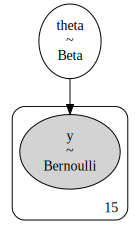

In [26]:
# Fit the observed data:
with pm.Model() as coin_flip: 
  theta = pm.Beta('theta', alpha=1, beta=1)
  y = pm.Bernoulli('y', theta, observed=observed_data)

pm.model_to_graphviz(coin_flip)

In [ ]:
with coin_flip:
 step = pm.Metropolis()
 print(f"step: {step}")
 trace = pm.sample(10000, step=step, return_inferencedata=True)

In [ ]:
var_names = ["theta"]
lines = list(xarray_var_iter(trace.posterior[var_names].mean(dim=("chain", "draw"))))
az.plot_trace(trace, lines=lines);

In [29]:
with coin_flip:
 step = pm.NUTS()
 trace = pm.sample(10000, step=step, return_inferencedata=True)
 
var_names = ["theta"]
lines = list(xarray_var_iter(trace.posterior[var_names].mean(dim=("chain", "draw"))))
az.plot_trace(trace, lines=lines);

Sequential sampling (2 chains in 1 job)
NUTS: [theta]


TypeError: ignored

In [ ]:
az.summary(trace)

In [ ]:
az.plot_posterior(trace, kind='kde', ref_val=0.5);

In [ ]:
with coin_flip:
  ppc = pm.sample_posterior_predictive(trace, var_names=[“theta”, “y”])
  ppc['y'].shape(20000, 15)

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=coin_flip))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(observed_data.mean())
ax.axvline(0.5, c='r')
ax.set(title='Posterior Predictive Check', xlabel='Observed Data', ylabel='Frequency')